In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This setting has one distince cluster and 3 cluusters packed close
# together

x, y = make_blobs(n_samples=500,
n_features=2,
centers=4,
cluster_std=1,
center_box=(-10.0,10.0),
shuffle=True,
random_state=1)

range_n_clusters = [2,3,4,5,6]

print(x,y)

[[-6.92324165e+00 -1.06695320e+01]
 [-8.63062033e+00 -7.13940564e+00]
 [-9.63048069e+00 -2.72044935e+00]
 [-2.30647659e+00  5.30797676e+00]
 [-7.57005366e+00 -3.01446491e+00]
 [-1.00051011e+00  2.77905153e+00]
 [-4.81826839e+00 -2.77214822e+00]
 [-5.33964799e+00 -1.27625764e+00]
 [-7.94308840e+00 -3.89993901e+00]
 [-5.54924525e+00 -3.41298968e+00]
 [-5.14508990e+00 -9.54492198e+00]
 [-7.09669936e+00 -8.04074036e+00]
 [-5.82641512e+00 -1.96346196e+00]
 [-1.83198811e+00  3.52863145e+00]
 [-7.34267235e+00 -3.16546482e+00]
 [-7.34072825e+00 -6.92427252e+00]
 [-7.94653906e+00 -3.36768655e+00]
 [-8.24598536e+00 -8.61315821e+00]
 [-1.98197711e+00  4.02243551e+00]
 [-4.35098035e+00 -3.69476678e+00]
 [-1.04768696e+01 -3.60318139e+00]
 [-1.10195984e+01 -3.15882031e+00]
 [-5.17255904e+00 -4.31835971e+00]
 [-2.40671820e+00  6.09894447e+00]
 [-6.72149498e+00 -2.88440806e+00]
 [-6.58935963e+00 -4.43379548e+00]
 [-1.46126019e+00  4.52549851e+00]
 [-9.19003455e-01  3.45278927e+00]
 [-1.04093517e+01 -2

c:\Users\MujtabaNasir\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\MujtabaNasir\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\MujtabaNasir\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\MujtabaNasir\AppData\Local\Programs\Python\Python313\L

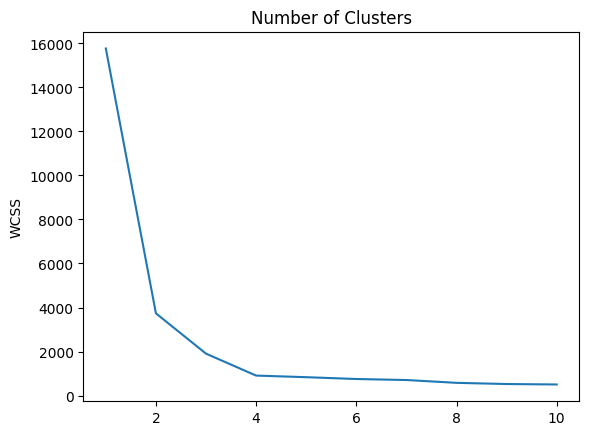

In [2]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init = 'k-means++', random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.title('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [3]:
clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(x)
print(cluster_labels)

[3 3 0 1 2 1 2 2 2 2 3 3 2 1 2 3 2 3 1 2 0 0 2 1 2 2 1 1 0 2 3 1 2 3 2 3 0
 0 3 0 2 0 1 2 2 3 0 2 1 1 1 0 0 2 3 0 0 0 0 2 1 1 0 2 1 2 3 2 0 0 3 0 2 3
 2 2 3 2 2 0 1 1 0 1 1 0 0 1 0 0 1 3 0 2 1 3 3 2 3 1 1 3 1 0 1 2 2 1 1 0 2
 3 1 0 1 0 1 2 1 2 0 3 3 0 2 0 1 3 3 2 1 0 0 0 0 3 1 2 1 1 2 3 2 1 1 1 2 2
 3 3 0 0 1 3 1 0 0 0 0 0 0 0 0 0 1 3 3 3 2 1 3 0 2 3 1 0 0 0 0 3 2 0 1 3 3
 0 2 3 3 2 1 1 3 3 2 1 2 3 3 1 3 0 1 2 2 3 2 0 3 2 0 2 0 3 2 2 2 1 0 1 2 3
 0 2 0 0 0 1 0 1 3 0 3 0 1 1 0 3 1 3 2 0 3 3 3 3 2 0 3 0 2 1 1 2 2 1 0 2 0
 1 2 1 0 0 1 2 3 3 0 0 0 2 1 1 2 1 0 3 1 3 1 3 3 1 3 1 1 2 0 0 0 2 2 0 3 1
 3 3 3 2 0 2 3 0 3 3 0 3 3 0 1 3 2 2 1 1 0 3 1 1 2 3 1 1 2 0 1 0 2 3 3 1 0
 3 2 1 1 2 2 2 3 2 1 1 0 1 1 1 1 3 3 2 1 0 2 3 1 0 1 2 1 0 2 0 1 2 2 3 1 3
 3 3 3 3 3 0 3 1 3 1 1 0 1 2 0 0 3 1 0 1 2 3 0 0 3 0 0 1 1 3 0 2 1 2 2 3 3
 2 3 0 0 3 0 3 0 1 3 1 0 2 1 0 2 1 3 2 1 1 0 2 0 2 3 1 3 2 1 3 3 3 0 1 2 3
 2 2 0 0 3 2 2 2 2 2 2 3 2 0 3 2 1 2 1 2 0 0 1 1 1 0 2 0 3 0 1 2 3 1 3 1 3
 2 1 1 3 0 2 3 0 0 0 3 2 

For n_clusters = 2 The avg silhouette_score is : 0.7049787496083262
For n_clusters = 3 The avg silhouette_score is : 0.5882004012129721
For n_clusters = 4 The avg silhouette_score is : 0.6505186632729437
For n_clusters = 5 The avg silhouette_score is : 0.561464362648773
For n_clusters = 6 The avg silhouette_score is : 0.4857596147013469


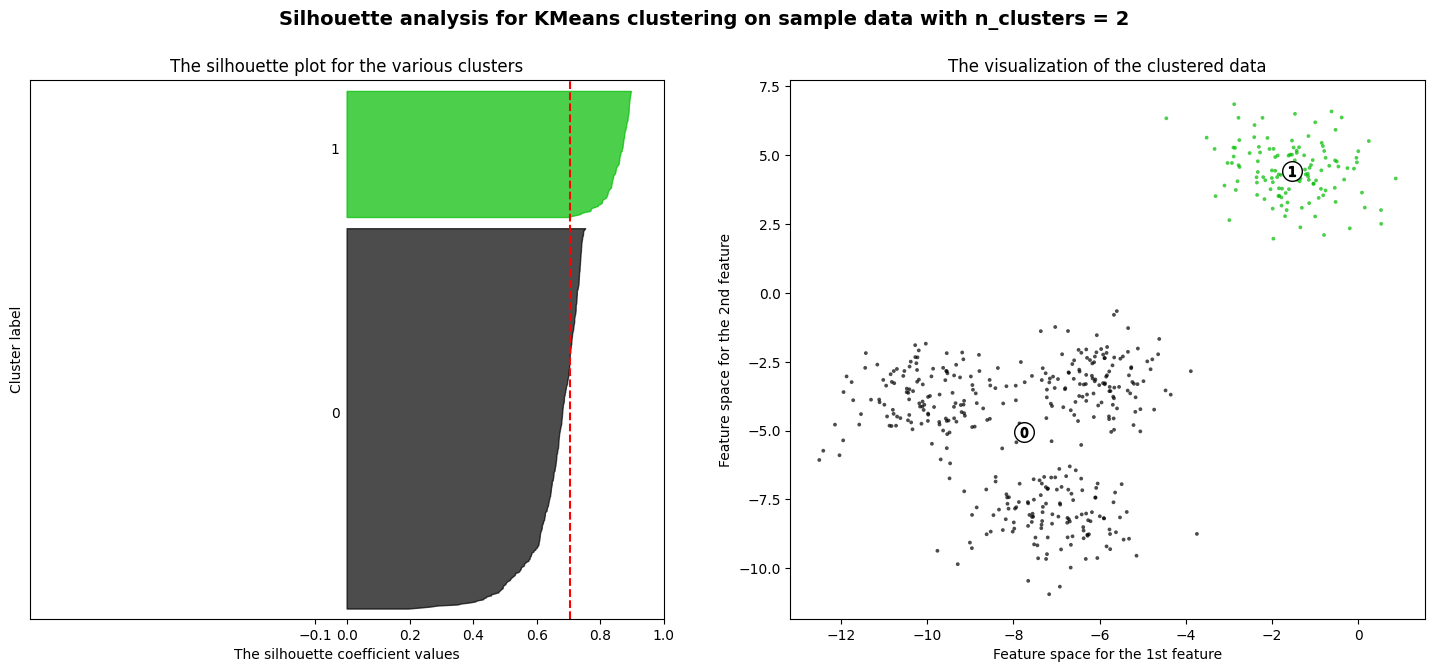

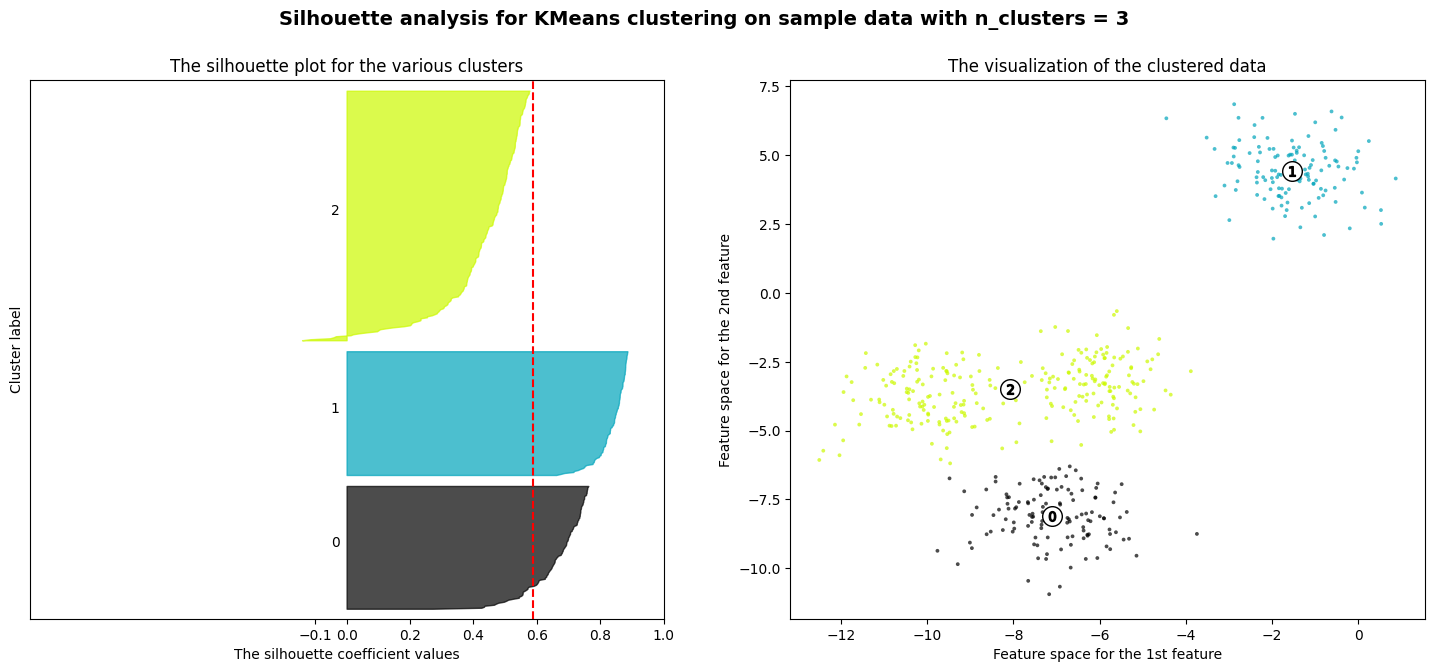

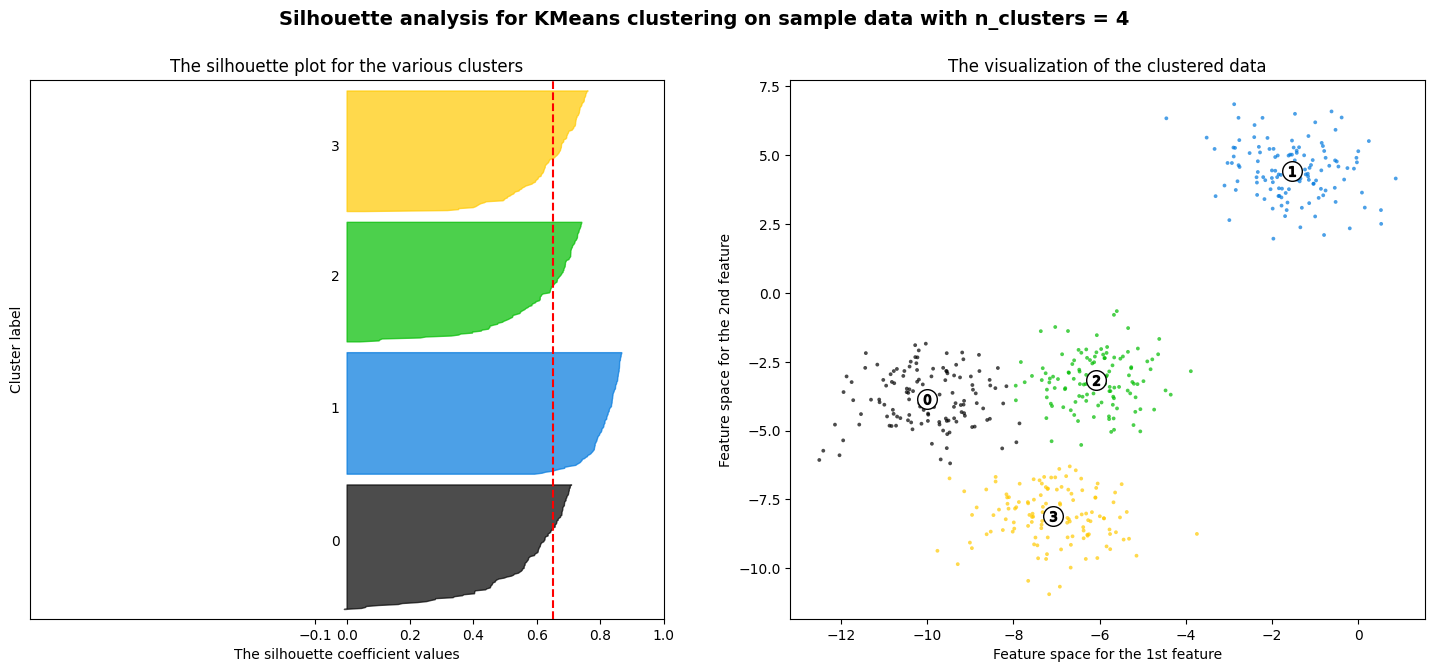

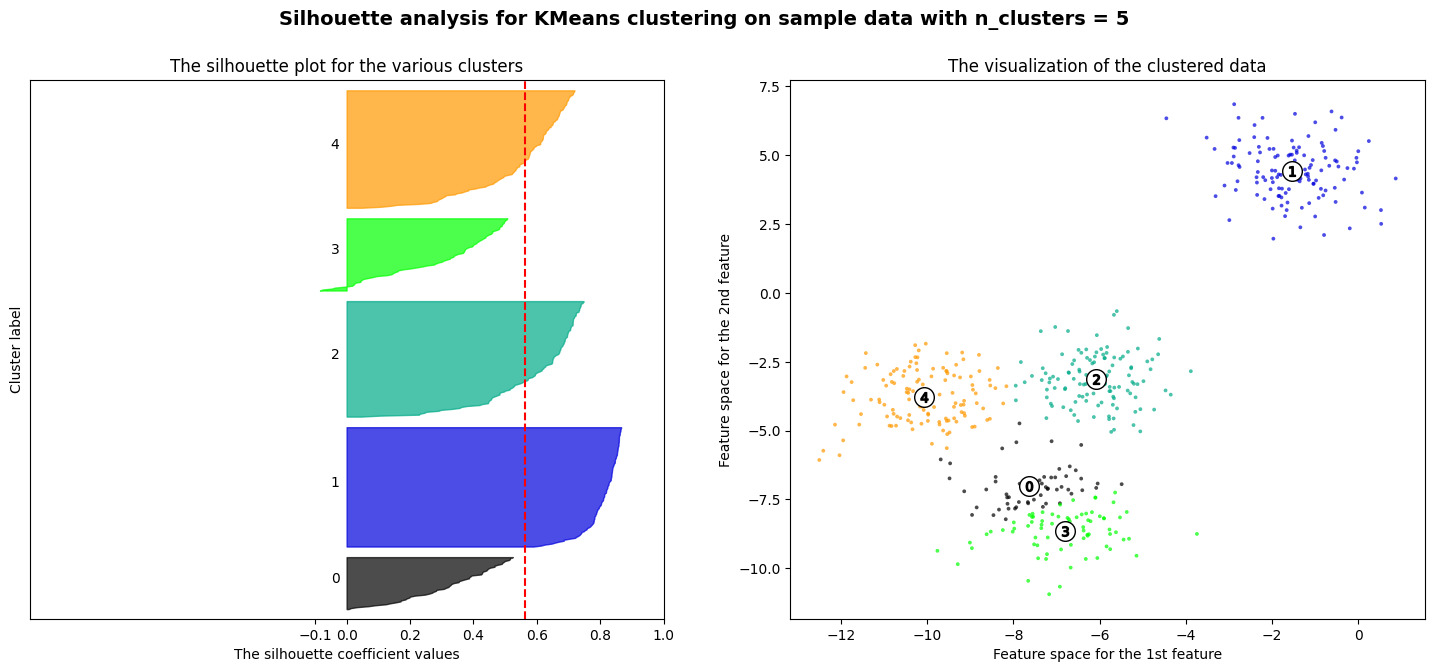

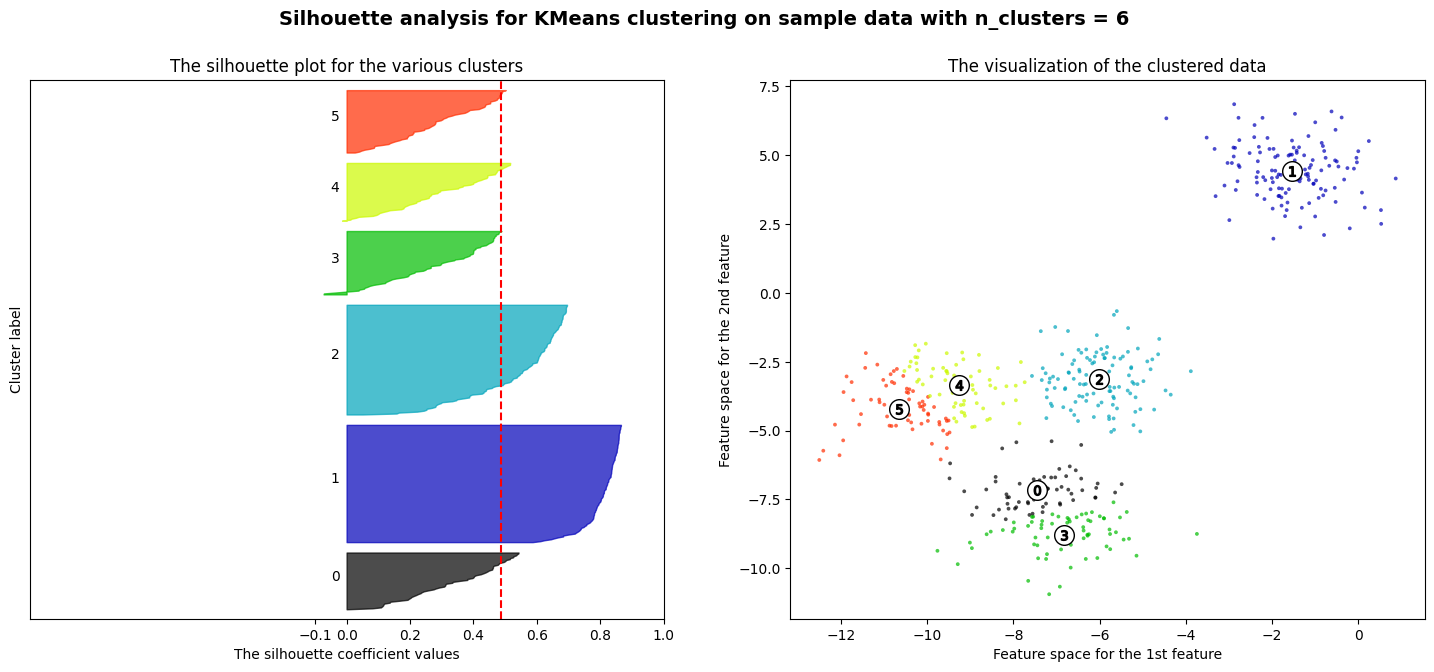

In [4]:
for n_clusters in range_n_clusters:
    # Sub plot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-1, 1])

    # The (n_clusters+1)*10 is for inserting blank space b/w silhouette
    # plots of individual clusters, to demonstrate clearly

    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initializing the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives perspective into the density and seperation of the formed
    # clusters

    silhouette_avg = silhouette_score(x, cluster_labels)
    print(
        "For n_clusters =", n_clusters, "The avg silhouette_score is :", silhouette_avg
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them

        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clearing the y axis labels
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        x[:, 0], x[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_

    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        (
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters
        ),
        fontsize=14,
        fontweight="bold",
    )